# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

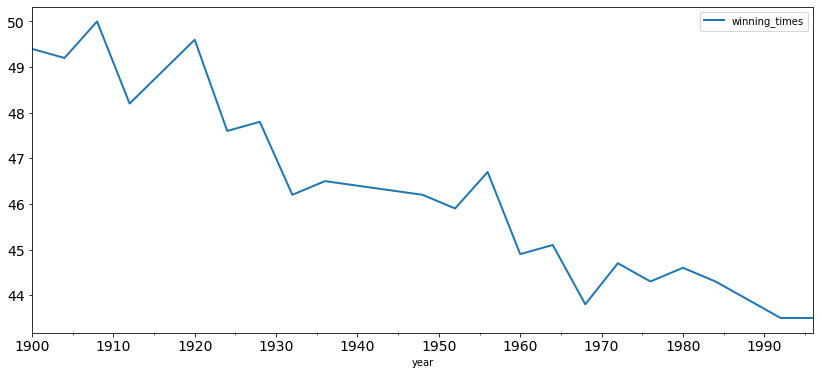

In [3]:
# Plot the time series
data.plot(figsize=(14,6), linewidth=2, fontsize=14);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff(periods=1).dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

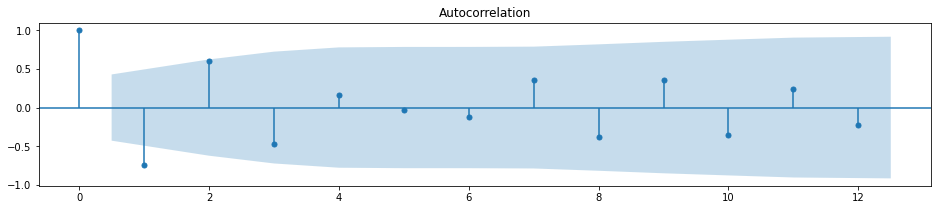

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the ACF
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(data_diff, ax=ax, lags=12);

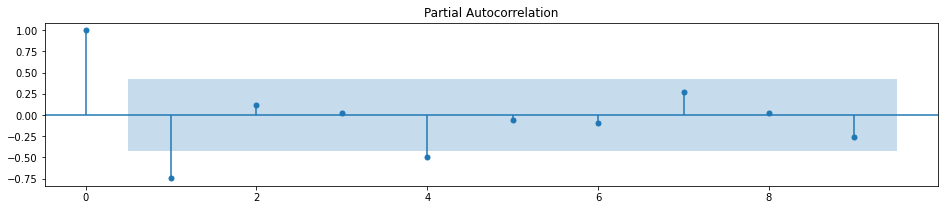

In [6]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(data_diff, ax=ax, lags=9, method="ywm");

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [7]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# AR
model_ar = ARIMA(data, order=(1, 0, 0))
results_ar = model_ar.fit()
results_ar.params
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   22
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -31.179
Date:                Mon, 15 Jul 2024   AIC                             68.358
Time:                        10:51:45   BIC                             71.631
Sample:                    12-31-1900   HQIC                            69.129
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3138      1.850     25.033      0.000      42.688      49.940
ar.L1          0.9168      0.113      8.126      0.000       0.696       1.138
sigma2         0.9168      0.363      2.525      0.012       0.205       1.628
===================================================================================
Ljung-Box (L1) (Q):                   9.34   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.00   Prob(JB):                         0.74
Heteroskedasticity (H):               0.17   Skew:                            -0.03
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# MA
model_ma = ARIMA(data, order=(0, 0, 1))
results_ma = model_ma.fit()
results_ma.params
results_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   22
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -41.833
Date:                Mon, 15 Jul 2024   AIC                             89.666
Time:                        10:52:05   BIC                             92.939
Sample:                    12-31-1900   HQIC                            90.437
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2001      0.587     78.725      0.000      45.050      47.350
ma.L1          0.5317      0.300      1.775      0.076      -0.055       1.119
sigma2         2.5858      1.180      2.192      0.028       0.273       4.898
===================================================================================
Ljung-Box (L1) (Q):                   3.04   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.08   Prob(JB):                         0.39
Heteroskedasticity (H):               0.45   Skew:                             0.63
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## What is your final model? Why did you pick this model?

In [10]:
# Your comments here
"""ARMA(1, 0, 0) performed better that the ARMA(0,0,1) having lower AIC and BIC values"""

'ARMA(1, 0, 0) performed better that the ARMA(0,0,1) having lower AIC and BIC values'

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 